In [1]:
import pandas as pd
from math import sqrt
from scipy.stats import norm, t
from matplotlib import pyplot as plt

In [2]:
datafile = "../../dataset/ch15/student_survey.txt"
data = pd.read_csv(datafile, sep='\t')

In [3]:
data.head()

,Gender,Do.you.believe.in.God,Pick.Random.Number,Height,Hand,Dates,FB.Friends,Weight,Drinks,Varsity,Songs,Diet,Politics.9Cat,Politics.numeric,Politics.3Cat
0,Female,Not sure,6,71.0,Predominantly Left Handed,1.0,314.0,138.0,0,Yes,1564.0,Omnivore,2. Very Liberal,2.0,Liberal
1,Male,No,2,66.0,Predominantly Right Handed,2.0,1228.0,130.0,0,No,97.0,Vegetarian,2. Very Liberal,2.0,Liberal
2,Male,Yes,9,73.0,Predominantly Right Handed,1.0,1189.0,183.0,0,Yes,1397.0,Carnivore,7. Moderatly Conservative,7.0,Conservative
3,Female,No,6,67.0,Predominantly Right Handed,1.0,0.0,125.0,0,No,2241.0,Omnivore,3. Moderately Liberal,3.0,Liberal
4,Male,Yes,7,71.0,Predominantly Right Handed,0.0,709.0,245.0,0,No,1299.0,Omnivore,5. Independent/Middle of Road,5.0,Moderate


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 299 non-null    object 
 1   Do.you.believe.in.God  299 non-null    object 
 2   Pick.Random.Number     299 non-null    int64  
 3   Height                 298 non-null    float64
 4   Hand                   299 non-null    object 
 5   Dates                  297 non-null    float64
 6   FB.Friends             294 non-null    float64
 7   Weight                 298 non-null    float64
 8   Drinks                 299 non-null    int64  
 9   Varsity                299 non-null    object 
 10  Songs                  295 non-null    float64
 11  Diet                   293 non-null    object 
 12  Politics.9Cat          298 non-null    object 
 13  Politics.numeric       298 non-null    float64
 14  Politics.3Cat          295 non-null    object 
dtypes: flo

In [5]:
fbfriends = data['FB.Friends']

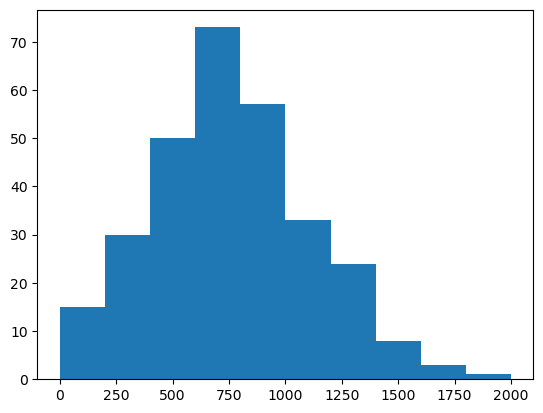

In [6]:
fbfriends.hist(grid=False);

**Prob.56** Facebook friends According to www.marketingcharts.com/, the average 18–24-year old has 649 Facebook friends. The stu- dent who collected the survey data in Student survey wanted to test if the mean number is higher at his school. Using his data, test an appropriate hypothesis and write a couple of sentences summarizing what you discover.


$H_0: \mu$ = 649 vs. $H_A: \mu \ne 649$

In [7]:
def p56():
    mu = 649
    ybar = fbfriends.mean()
    std = fbfriends.std(ddof=1)
    SE = std/sqrt(fbfriends.size)
    tscore = (ybar - mu) / SE
    pval = (1 - t.cdf(tscore, fbfriends.size-1)) * 2
    
    print(f"ybar: {ybar:.3f}")
    print(f"std: {std:.3f}")
    print(f"SE: {SE:.3f}")
    print(f"t-score: {tscore:.3f}")
    print(f"pval: {pval:.8f}")
p56()

ybar: 751.163
std: 357.321
SE: 20.664
t-score: 4.944
pval: 0.00000128


**Answer to Prob. 56**  With a P-value this large, I reject the null hypothesis and conclude that the mean friend number at his school is signifantly greater than the "marketcharts" reported average.

**Prob.58** Facebook friends again A bootstrap test of the hypothesis in Exercise 56 produced the following distribution (shifted to cen- ter the histogram at the hypothesized mean of 649): (Data in Student Survey)

a) What is the P-value of this test?

b) Write a sentence or two with your conclusion.

boostrap p-value: 0.000280


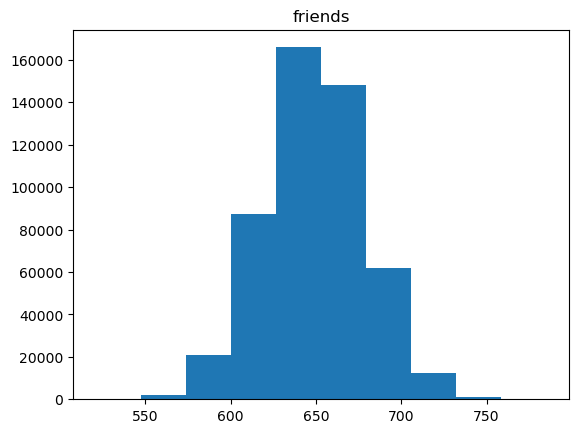

In [27]:
ybar = fbfriends.mean()
mu = 649
def p58step1():
    nsamples = 500_000
    sample_size = 150
    sample_means = []
    for _ in range(nsamples):
        sample_means.append(fbfriends.sample(n=sample_size, replace=True).mean() - ybar + mu)
    sample_means = pd.DataFrame(data=sample_means, columns=['friends'])
    sample_means.hist(grid=False)
    return sample_means

sample_means = p58step1()

def p58step2():
    ha = sample_means[sample_means.friends > ybar]
    print(f"boostrap p-value: {len(ha)/len(sample_means):.6f}")

p58step2()